## Problem Statement:

Mavoix Solutions Private Limited offering career opportunity for its various project(s). There are two kind of job profiles are available (a) Web Development and (b) Data Scientist.

There are almost 400 candidates applied for these role. Your assignment is to build a Machine Learning model , which will help the management to Identify the potential candidates

for both the roles from the given data.

In [ ]:
#Import Libreary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# To visible all the coulmns in dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Load the Data
data = pd.read_excel('mavoix_ml_sample_dataset.xlsx')

In [3]:
data.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),Unnamed: 10,AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,NaN,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,NaN,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,NaN,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,NaN,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,NaN,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


In [4]:
#Remove space from the coulmn
data.columns =data.columns.str.replace(' ','_')

In [5]:
#Drop the unnamed blank coulmn
data.drop(['Unnamed:_10'], axis=1,inplace= True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 23 columns):
Application_ID                392 non-null object
Current_City                  392 non-null object
Python_(out_of_3)             392 non-null int64
R_Programming_(out_of_3)      392 non-null int64
Deep_Learning_(out_of_3)      392 non-null int64
PHP_(out_of_3)                392 non-null int64
MySQL_(out_of_3)              392 non-null int64
HTML_(out_of_3)               392 non-null int64
CSS_(out_of_3)                392 non-null int64
JavaScript_(out_of_3)         392 non-null int64
AJAX_(out_of_3)               392 non-null int64
Bootstrap_(out_of_3)          392 non-null int64
MongoDB_(out_of_3)            392 non-null int64
Node.js_(out_of_3)            392 non-null int64
ReactJS_(out_of_3)            392 non-null int64
Other_skills                  378 non-null object
Degree                        380 non-null object
Stream                        374 non-null object
Current_

In [7]:
#Checking the missing value 
data.isna().sum()

Application_ID                  0
Current_City                    0
Python_(out_of_3)               0
R_Programming_(out_of_3)        0
Deep_Learning_(out_of_3)        0
PHP_(out_of_3)                  0
MySQL_(out_of_3)                0
HTML_(out_of_3)                 0
CSS_(out_of_3)                  0
JavaScript_(out_of_3)           0
AJAX_(out_of_3)                 0
Bootstrap_(out_of_3)            0
MongoDB_(out_of_3)              0
Node.js_(out_of_3)              0
ReactJS_(out_of_3)              0
Other_skills                   14
Degree                         12
Stream                         18
Current_Year_Of_Graduation      0
Performance_PG                289
Performance_UG                 54
Performance_12                163
Performance_10                177
dtype: int64

In [8]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(data[feature].isnull().mean(),4)))

Other_skills: 0.0357% missing values
Degree: 0.0306% missing values
Stream: 0.0459% missing values
Performance_PG: 0.7372% missing values
Performance_UG: 0.1378% missing values
Performance_12: 0.4158% missing values
Performance_10: 0.4515% missing values


In [9]:
## Replace missing value with a new label
#def replace_cat_feature(data,features_nan):
#    data1=data.copy()
#    data1[features_nan]=data1[features_nan].fillna('Missing')
#    return data1

#data=replace_cat_feature(data,features_nan)

#data[features_nan].isnull().sum()

In [10]:
data

,Application_ID,Current_City,Python_(out_of_3),R_Programming_(out_of_3),Deep_Learning_(out_of_3),PHP_(out_of_3),MySQL_(out_of_3),HTML_(out_of_3),CSS_(out_of_3),JavaScript_(out_of_3),AJAX_(out_of_3),Bootstrap_(out_of_3),MongoDB_(out_of_3),Node.js_(out_of_3),ReactJS_(out_of_3),Other_skills,Degree,Stream,Current_Year_Of_Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80
5,ML0006,Bangalore,2,0,0,1,0,3,2,1,0,0,0,0,0,"Data Analytics, Machine Learning, MySQL, Python",NaN,Data Science Engineering,2019,NaN,70.00/100,NaN,NaN
6,ML0007,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,"MS-Word, Python, Robotics",NaN,Artificial Intelligence,2020,NaN,80.00/100,85.00/85.00,80.00/80.00
7,ML0008,Mumbai,3,1,0,0,0,2,0,0,0,0,0,0,0,"Data Analytics, Python, SQL, .NET, ASP.NET, C#...",PG Diploma in Data Science,NaN,2019,3.61/4,2.68/4,NaN,NaN
8,ML0009,Bangalore,3,0,0,0,0,2,2,0,0,0,0,0,0,"English Proficiency (Spoken), English Proficie...",Post Graduate Programme (PGP),Data Science,2020,8.00/10,7.00/10,70.00/70.00,93.00/93.00
9,ML0010,Bangalore,2,0,2,0,0,2,2,2,0,0,0,0,2,"MS-Office, Computer Vision, Data Analytics, De...",Post Graduate Programme (PGP),Artificial Intelligence And Machine Learning,2020,71.00/100,60.00/100,71.00/71.00,NaN


# Handeling coulms in the data set

In [12]:
#Bangalore has some miss entry due to spaling mistake named as Banglore
#So we convert Banglore as Bangalore
data.Current_City.replace(['Banglore'],['Bangalore'] , inplace=True)

In [13]:
#Totalndidates are from 62 Cityes but we hiring for bangalore region only so we are considering bangalore only
data["Current_City"].value_counts()

Bangalore        228
Hyderabad         22
Chennai           12
Pune              10
Delhi              8
Noida              5
Durg               5
Durgapur           5
Kanpur             4
Jaipur             4
Mahé               4
Indore             3
Shillong           3
Kozhikode          3
Kolkata            3
Coimbatore         3
Bhubaneswar        3
Nagpur             3
Thrissur           3
Ranchi             3
Namakkal           2
Kochi              2
Kannur             2
Visakhapatnam      2
Jalandhar          2
Walajapet          2
Varanasi           2
Guwahati           2
Jamshedpur         2
Tirupati           2
                ... 
Dehradun           2
Raigarh            2
Mysuru             2
Mumbai             2
Vellore            1
Ernakulam          1
Greater Noida      1
Tezpur             1
Chandigarh         1
Ghaziabad          1
Nashik             1
Agra               1
Haryana            1
Barhampur          1
Idupulapaya        1
Rudrapur           1
Roorkee      

In [14]:
#Checking the candidate in only bangalore
data1=data[data["Current_City"] == 'Bangalore']

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 388
Data columns (total 23 columns):
Application_ID                228 non-null object
Current_City                  228 non-null object
Python_(out_of_3)             228 non-null int64
R_Programming_(out_of_3)      228 non-null int64
Deep_Learning_(out_of_3)      228 non-null int64
PHP_(out_of_3)                228 non-null int64
MySQL_(out_of_3)              228 non-null int64
HTML_(out_of_3)               228 non-null int64
CSS_(out_of_3)                228 non-null int64
JavaScript_(out_of_3)         228 non-null int64
AJAX_(out_of_3)               228 non-null int64
Bootstrap_(out_of_3)          228 non-null int64
MongoDB_(out_of_3)            228 non-null int64
Node.js_(out_of_3)            228 non-null int64
ReactJS_(out_of_3)            228 non-null int64
Other_skills                  218 non-null object
Degree                        221 non-null object
Stream                        220 non-null object
Current_

In [16]:
# Checking Unique coulmn in Degree
data1.Degree.unique()

array(['Bachelor of Science (B.Sc)', 'Bachelor of Technology (B.Tech)',
       'Master of Science (M.Sc)', 'Bachelor of Engineering (B.E)', nan,
       'Post Graduate Programme (PGP)', 'Master of Technology (M.Tech)',
       'Executive MBA', 'MBA', 'B.Tech (Hons.)',
       'PG Diploma in Data Science',
       'Post Graduate Diploma in Big Data Analytics (PG-DBDA)',
       'Bachelor of Commerce (B.Com)',
       'Bachelor of Engineering (B.E) (Hons.)',
       'Bachelor of Computer Applications (BCA)',
       'Master of Computer Applications (MCA)', 'Integrated M.Sc.',
       'Bachelor of Business Management (B.B.M.)',
       'Master of Science (M.S.)',
       'Post Graduate Program in Business Analytics',
       'Master of Science (M.Sc) (Hons.)', 'Integrated B.Tech',
       'Integrated M.Tech', 'Integrated B.E & M.Tech'], dtype=object)

In [17]:
# Checking Unique coulumn Current_Year_Of_Graduation
data1.Current_Year_Of_Graduation.unique()

array([2017, 2019, 2018, 2020, 2016, 2015, 2012, 2021, 2013, 2008, 2007,
       2006, 2004, 2014, 2023, 2022], dtype=int64)

In [18]:
# Checking Unique coulumn Stream
data1.Stream.unique()

array(['Mathematics', 'Computer Science & Engineering',
       'Computer  Science', 'Electronics and Communication',
       'Production Engineering', 'Data Science Engineering',
       'Artificial Intelligence', 'Data Science',
       'Artificial Intelligence And Machine Learning',
       'Data Science And Engineering', 'Statistics',
       'Electronics and Instrumentation',
       'Digital Communication & Networking', 'Business Analytics',
       'Mechanical Engineering', 'Big Data Analytics', nan,
       'computer science', 'Instrumentation & Electronics',
       'Data Science, Data Analytics, Big Data', 'Engineering Design',
       'Information Science', 'Information Technology',
       'Computer  Science And Engineering',
       'Computer Science AndEngineering', 'Civil Engineering',
       'Marketing', 'Aerospace Engineering', 'Commerce', 'Data Analytics',
       'Advanced Big Data Analytics', 'Technology', 'Finance',
       'Electrical and Electronics Engineering', 'Computer Appl

# Solve the mismatch duplicate coloumn due to spelling mistake

In [19]:
# Stream coulmn has too many missmatch duplicate entry
# So lets modify that
#Modify all possible miss spelling errors to 'Computer Science & Engineering'

data1=data1.replace({'Stream':{'Computer  Science' : 'Computer Science & Engineering','computer science' : 'Computer Science & Engineering','Computer  Science And Engineering': 'Computer Science & Engineering','Computer Science AndEngineering':'Computer Science & Engineering','Computer Science And Mathematics':'Computer Science & Engineering','cs':'Computer Science & Engineering'}})


In [20]:
#Modify all possible miss spelling errors to 'Data Science Engineer'
data1=data1.replace({'Stream':{'Data Science Engineering':'Data Science Engineer','Data Science And Engineering': 'Data Science Engineer','Data Science': 'Data Science Engineer'}})

In [21]:
#Modify all possible miss spelling errors to 'AI Engineer'
data1=data1.replace({'Stream':{'Artificial Intelligence':'AI Engineer','Machine Learning And Artificial Intelligence':'AI Engineer','Artificial Intelligence And Machine Learning':'AI Engineer','Mechanical Engineering':'AI Engineer'}})

In [22]:
#Modify all possible miss spelling errors to 'Big Data'
data1=data1.replace({'Stream':{'Advanced Big Data Analytics':'Big Data','Big Data Analytics':'Big Data'}})

In [23]:
data1

,Application_ID,Current_City,Python_(out_of_3),R_Programming_(out_of_3),Deep_Learning_(out_of_3),PHP_(out_of_3),MySQL_(out_of_3),HTML_(out_of_3),CSS_(out_of_3),JavaScript_(out_of_3),AJAX_(out_of_3),Bootstrap_(out_of_3),MongoDB_(out_of_3),Node.js_(out_of_3),ReactJS_(out_of_3),Other_skills,Degree,Stream,Current_Year_Of_Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science & Engineering,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80
5,ML0006,Bangalore,2,0,0,1,0,3,2,1,0,0,0,0,0,"Data Analytics, Machine Learning, MySQL, Python",NaN,Data Science Engineer,2019,NaN,70.00/100,NaN,NaN
6,ML0007,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,"MS-Word, Python, Robotics",NaN,AI Engineer,2020,NaN,80.00/100,85.00/85.00,80.00/80.00
8,ML0009,Bangalore,3,0,0,0,0,2,2,0,0,0,0,0,0,"English Proficiency (Spoken), English Proficie...",Post Graduate Programme (PGP),Data Science Engineer,2020,8.00/10,7.00/10,70.00/70.00,93.00/93.00
9,ML0010,Bangalore,2,0,2,0,0,2,2,2,0,0,0,0,2,"MS-Office, Computer Vision, Data Analytics, De...",Post Graduate Programme (PGP),AI Engineer,2020,71.00/100,60.00/100,71.00/71.00,NaN
10,ML0011,Bangalore,2,0,0,0,0,0,0,0,0,0,0,0,0,"CSS, HTML, Java, Python, SQL",Bachelor of Technology (B.Tech),Electronics and Communication,2018,NaN,64.00/100,95.00/95.00,NaN


# Fix the Performance coulmns in the data set convert it into Percentage

In [24]:
new=data1['Performance_PG'].str.split("/" ,n=1,expand=True)
data1['Performance_PG']=new[0]


In [25]:
new1=data1['Performance_UG'].str.split("/" ,n=1,expand=True)
data1['Performance_UG']=new1[0]

In [26]:
new2=data1['Performance_12'].str.split("/" ,n=1,expand=True)
data1['Performance_12']=new2[0]

In [27]:
new3=data1['Performance_10'].str.split("/" ,n=1,expand=True)
data1['Performance_10']=new3[0]

In [28]:
data1

,Application_ID,Current_City,Python_(out_of_3),R_Programming_(out_of_3),Deep_Learning_(out_of_3),PHP_(out_of_3),MySQL_(out_of_3),HTML_(out_of_3),CSS_(out_of_3),JavaScript_(out_of_3),AJAX_(out_of_3),Bootstrap_(out_of_3),MongoDB_(out_of_3),Node.js_(out_of_3),ReactJS_(out_of_3),Other_skills,Degree,Stream,Current_Year_Of_Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,0,2,0,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,0,0,0,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50,92.20,96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,0,0,0,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science & Engineering,2018,7.91,70.00,64.83,77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,0,0,0,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86,76.00,84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,0,0,2,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38,65.20,68.80
5,ML0006,Bangalore,2,0,0,1,0,3,2,1,0,0,0,0,0,"Data Analytics, Machine Learning, MySQL, Python",NaN,Data Science Engineer,2019,NaN,70.00,NaN,NaN
6,ML0007,Bangalore,1,0,0,0,0,0,0,0,0,0,0,0,0,"MS-Word, Python, Robotics",NaN,AI Engineer,2020,NaN,80.00,85.00,80.00
8,ML0009,Bangalore,3,0,0,0,0,2,2,0,0,0,0,0,0,"English Proficiency (Spoken), English Proficie...",Post Graduate Programme (PGP),Data Science Engineer,2020,8.00,7.00,70.00,93.00
9,ML0010,Bangalore,2,0,2,0,0,2,2,2,0,0,0,0,2,"MS-Office, Computer Vision, Data Analytics, De...",Post Graduate Programme (PGP),AI Engineer,2020,71.00,60.00,71.00,NaN
10,ML0011,Bangalore,2,0,0,0,0,0,0,0,0,0,0,0,0,"CSS, HTML, Java, Python, SQL",Bachelor of Technology (B.Tech),Electronics and Communication,2018,NaN,64.00,95.00,NaN


In [33]:
data1.isnull().sum()

Application_ID                  0
Current_City                    0
Python_(out_of_3)               0
R_Programming_(out_of_3)        0
Deep_Learning_(out_of_3)        0
PHP_(out_of_3)                  0
MySQL_(out_of_3)                0
HTML_(out_of_3)                 0
CSS_(out_of_3)                  0
JavaScript_(out_of_3)           0
AJAX_(out_of_3)                 0
Bootstrap_(out_of_3)            0
MongoDB_(out_of_3)              0
Node.js_(out_of_3)              0
ReactJS_(out_of_3)              0
Other_skills                   10
Degree                          7
Stream                          8
Current_Year_Of_Graduation      0
Performance_PG                155
Performance_UG                 37
Performance_12                104
Performance_10                113
dtype: int64

In [121]:
# Fix the Separater in the coloumn
data1.columns =data1.columns.str.replace('(','_')
data1.columns =data1.columns.str.replace(')','_')
data1.columns =data1.columns.str.replace('__','_')

# Requirement for job profile 

In [ ]:
# For DataScience profile we need strong knownedge in
# Python_(out_of_3),R_Programming_(out_of_3),Deep_Learning_(out_of_3),MySQL_(out_of_3),MongoDB_(out_of_3)

In [ ]:
# For Web Development we need strong knowledge in 
# PHP_(out_of_3),HTML_(out_of_3),JavaScript_(out_of_3),Bootstrap_(out_of_3),Node.js_(out_of_3),ReactJS_(out_of_3),AJAX_(out_of_3)

In [122]:
#Create a data for Data science
DS=data1.iloc[:,[0,1,2,3,4,6,12,15,16,17,18]]

In [123]:
DS.describe()

,Python_out_of_3_,R_Programming_out_of_3_,Deep_Learning_out_of_3_,MySQL_out_of_3_,MongoDB_out_of_3_,Current_Year_Of_Graduation
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,1.320175,0.548246,0.416667,0.434211,0.035088,2018.442982
std,1.018825,0.906339,0.822098,0.850015,0.245840,2.483655
min,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
75%,2.000000,1.000000,0.000000,0.000000,0.000000,2020.000000
max,3.000000,3.000000,3.000000,3.000000,2.000000,2023.000000


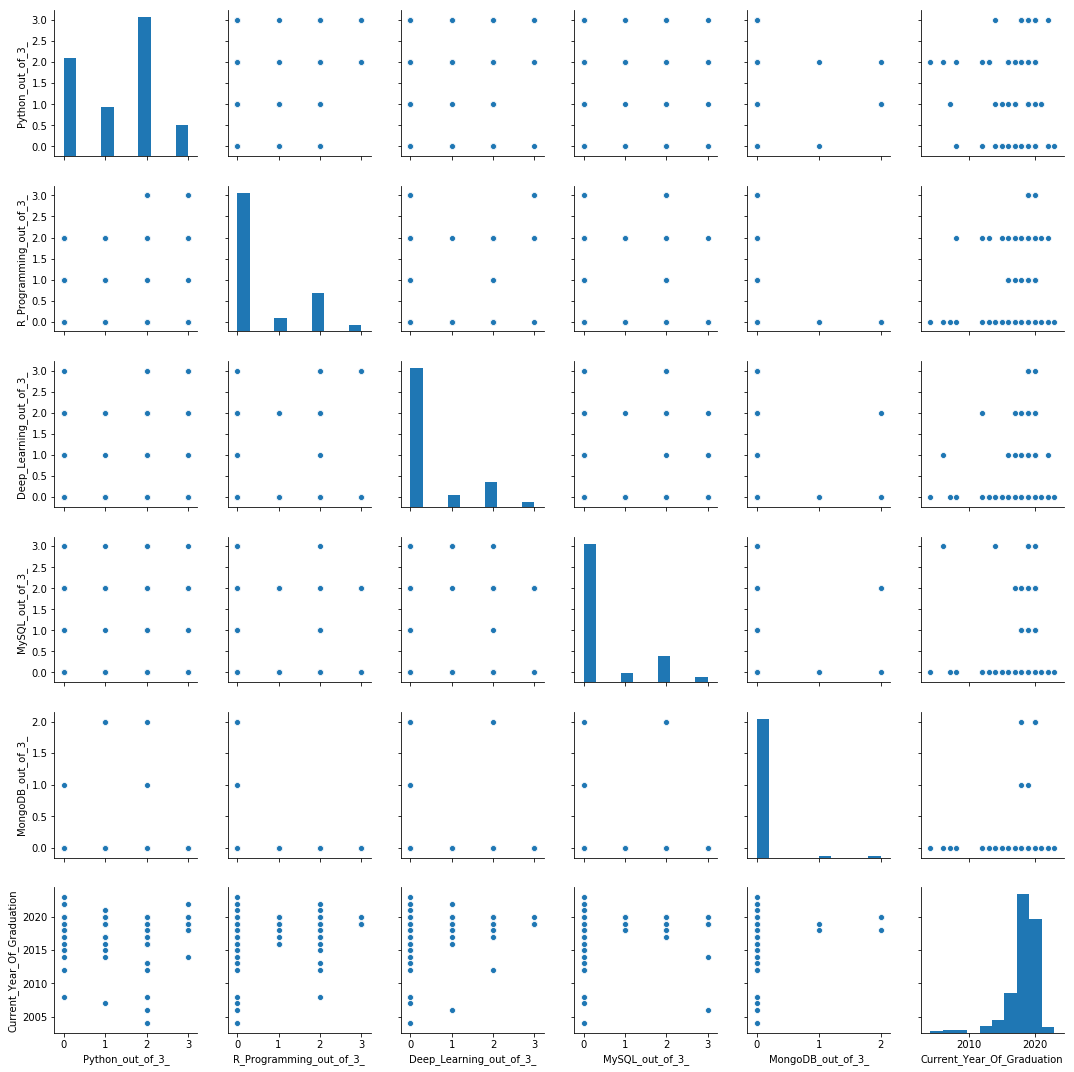

In [124]:
import seaborn as sns
sns.pairplot(DS)

In [ ]:
# Find Out the Best Candidate in Data Science

In [118]:
DS1=DS[DS['Python_out_of_3_']==3]

In [119]:
DS2=DS1[DS1['R_Programming_out_of_3_']==3]

In [120]:
DS2 # These 2 candidates are best for data science because they have good knowledge in python,R programing and deep learning

,Application_ID,Current_City,Python_out_of_3_,R_Programming_out_of_3_,Deep_Learning_out_of_3_,MySQL_out_of_3_,MongoDB_out_of_3_,Other_skills,Degree,Stream,Current_Year_Of_Graduation
34,ML0035,Bangalore,3,3,3,2,0,"Artifical Intelligence, Data Analytics, Deep L...",Bachelor of Technology (B.Tech),Electronics and Communication,2019
76,ML0077,Bangalore,3,3,3,0,0,"Adobe Photoshop, CSS, Computer Vision, Data An...",Bachelor of Technology (B.Tech),Instrumentation & Electronics,2019


In [125]:
# Find Out best Candidate in Web Deverloper

In [126]:
#Create a data for Web developer
WP=data1.iloc[:,[0,1,5,6,7,8,9,10,11,13,14,15,16,17,18]]

In [127]:
WP.describe()

,PHP_out_of_3_,MySQL_out_of_3_,HTML_out_of_3_,CSS_out_of_3_,JavaScript_out_of_3_,AJAX_out_of_3_,Bootstrap_out_of_3_,Node.js_out_of_3_,ReactJS_out_of_3_,Current_Year_Of_Graduation
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,0.552632,0.434211,1.302632,1.043860,0.728070,0.017544,0.263158,0.087719,0.162281,2018.442982
std,0.871397,0.850015,1.078665,1.009997,0.936627,0.131575,0.696785,0.399590,0.455005,2.483655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2004.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2018.000000
50%,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.000000
75%,1.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,2.000000,2023.000000


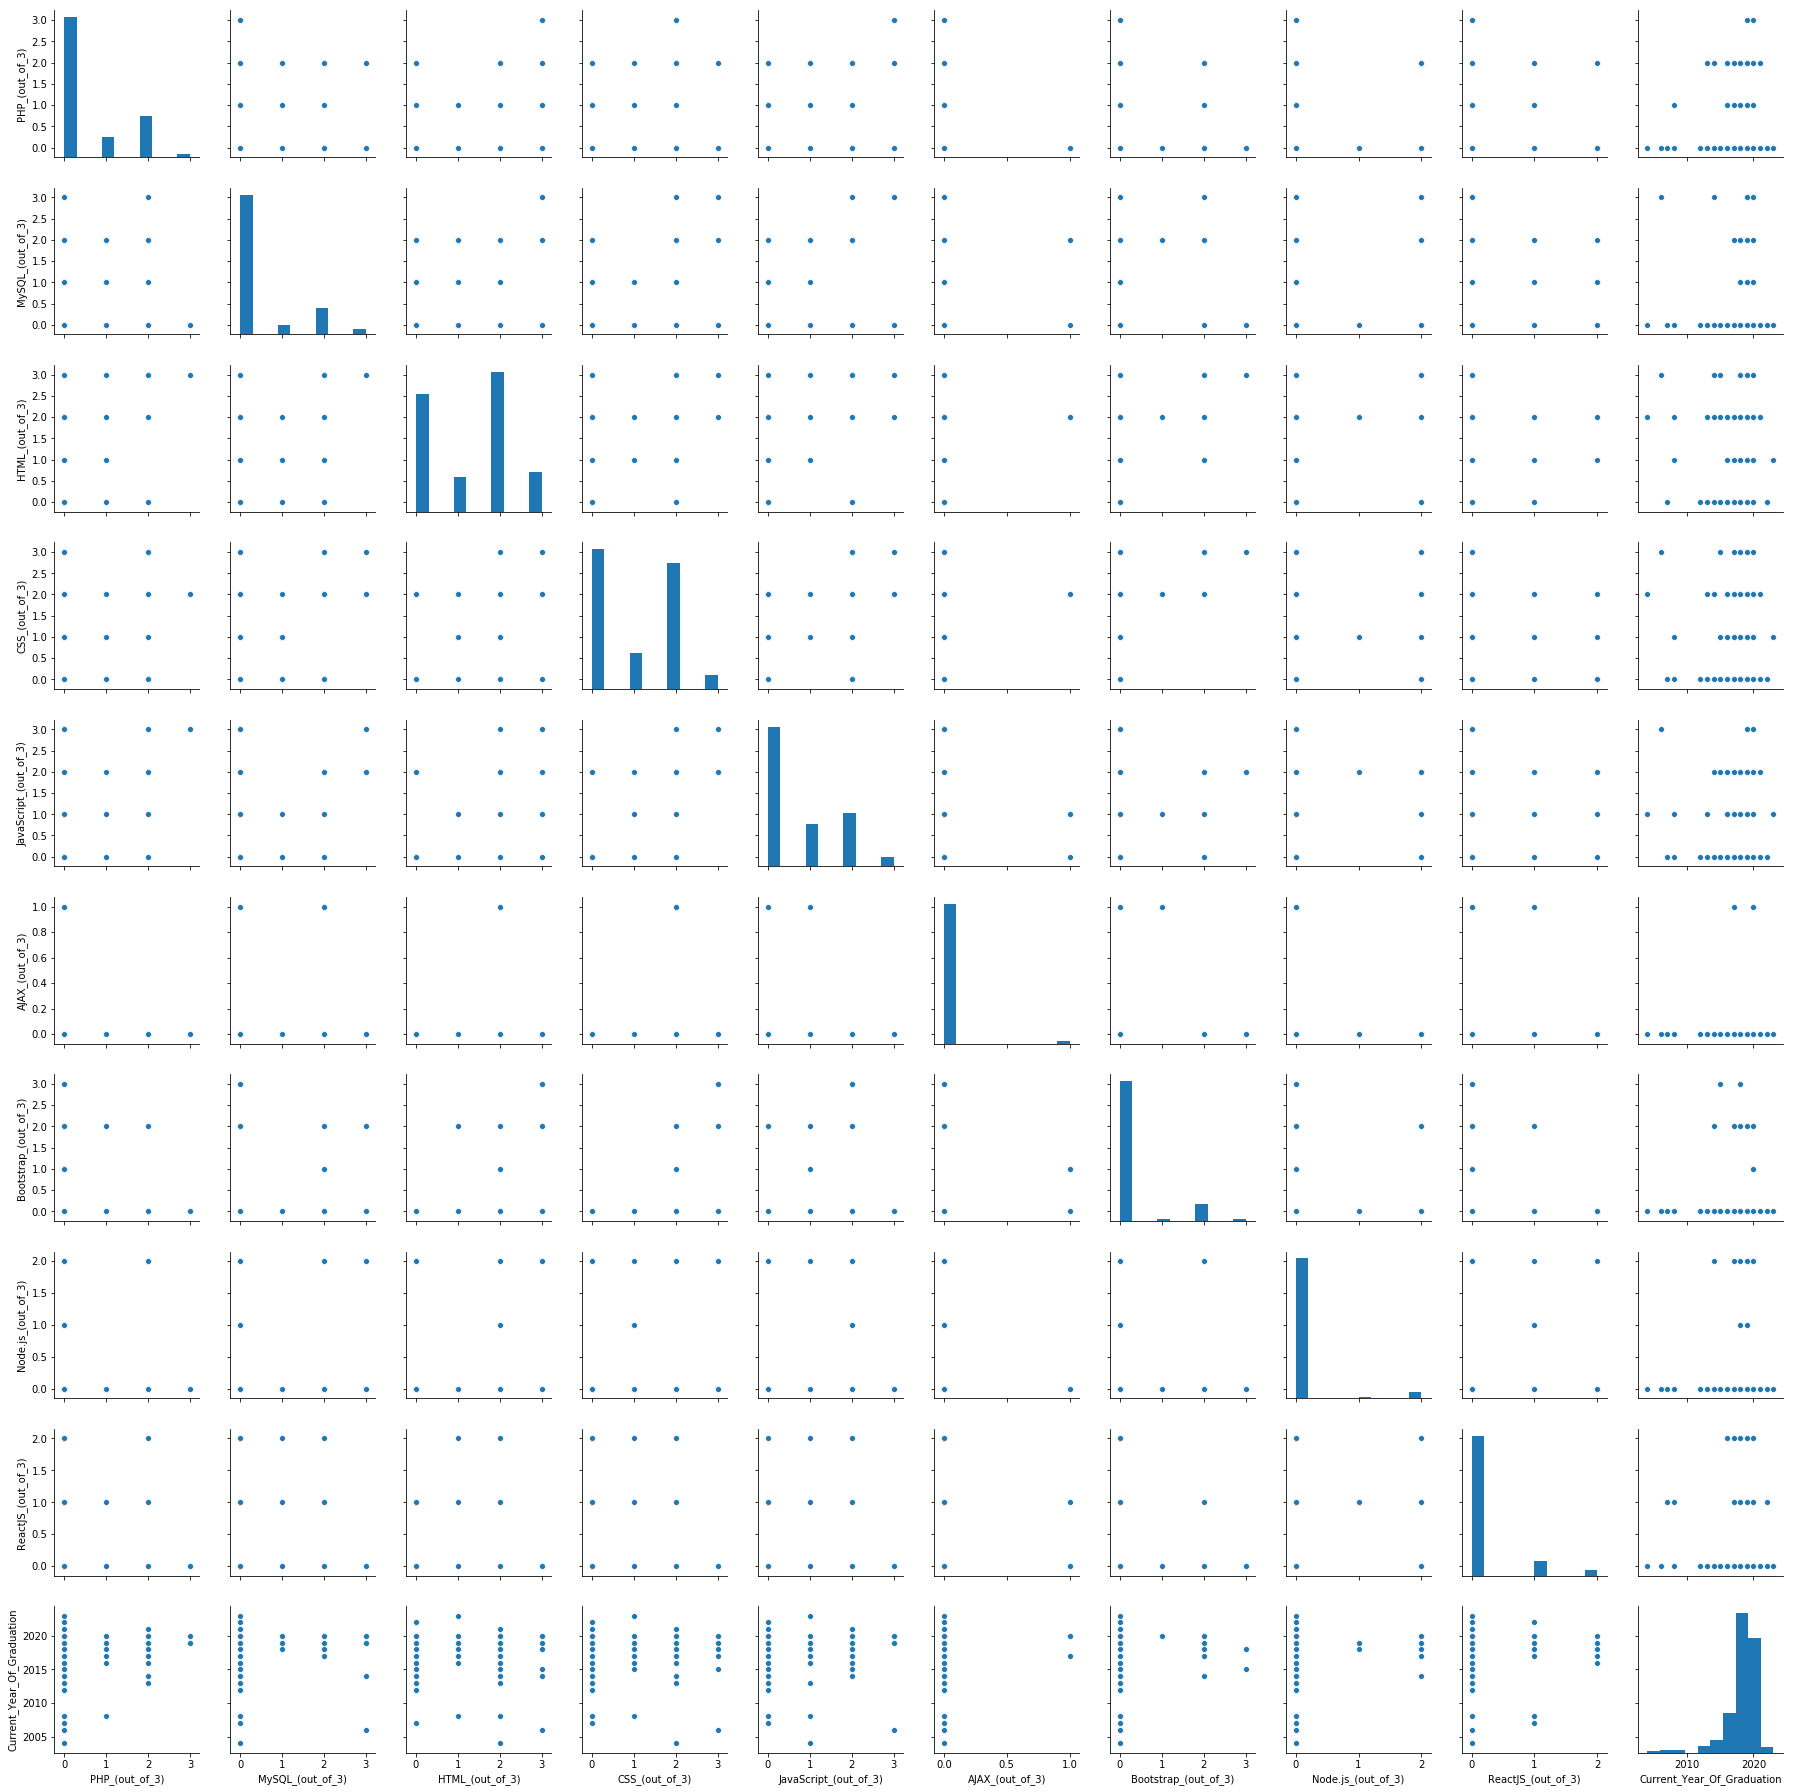

In [59]:
import seaborn as sns
sns.pairplot(WP)

In [144]:
WP1=WP[WP['PHP_out_of_3_']==3]

In [145]:
WP2=WP1[WP1['HTML_out_of_3_']==3]

In [147]:
WP3=WP2[WP2['JavaScript_out_of_3_']==3]

In [142]:
WP3=WP2[WP2['JavaScript_out_of_3_']==1]

In [148]:
WP3

,Application_ID,Current_City,PHP_out_of_3_,MySQL_out_of_3_,HTML_out_of_3_,CSS_out_of_3_,JavaScript_out_of_3_,AJAX_out_of_3_,Bootstrap_out_of_3_,Node.js_out_of_3_,ReactJS_out_of_3_,Other_skills,Degree,Stream,Current_Year_Of_Graduation
185,ML0186,Bangalore,3,0,3,2,3,0,0,0,0,"MySQL, Java, SQL, Data Analytics, MS-Excel, Ma...",Master of Technology (M.Tech),Computer Science & Engineering,2019
209,ML0210,Bangalore,3,0,3,2,3,0,0,0,0,"C++ Programming, Data Structures, Python, SQL,...",Master of Computer Applications (MCA),Computer Science & Engineering,2020
261,ML0262,Bangalore,3,0,3,2,3,0,0,0,0,"Algorithms, C Programming, Data Structures, Da...",Master of Computer Applications (MCA),Computer Application,2019
381,ML0382,Bangalore,3,0,3,2,3,0,0,0,0,"Algorithms, C Programming, Data Structures, Da...",Master of Computer Applications (MCA),Computer Application,2019


In [ ]:
# These are the best candidate for WebDevloper

# Apply Kmeans

In [96]:
#Use algorithms to get this view.
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5,
              random_state=10)

In [97]:
features = DS.iloc[:,[2,3,4,5,6]]

In [101]:
#features

In [102]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(features)
y_kmeans = kmeans.predict(features)